# Random Forest Classifier
Tujuannya adalah membuat model yang dapat membantu memprediksi spesies penguin berdasarkan atribut fisik, kemudian dapat menggunakan model tersebut untuk membantu peneliti mengklasifikasikan penguin di lapangan, daripada membutuhkan ahli biologi yang berpengalaman

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# memuat dataset
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\penguins_size.csv')

In [3]:
# menampilkan 5 baris pertama
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## EDA - explonatory data analys

In [4]:
# menampilkan jumlah kolom dan baris
df.shape

(344, 7)

In [5]:
# ringksan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# ringkasan statistik
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
# menampilkan nilai null
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
# membuat persentase nilai null terhadap keseluruhan data
print(f'persentase nilai null :','{0:.1f}%'.format(100*(10/344)))

persentase nilai null : 2.9%


In [9]:
# menghapus nilai null
df = df.dropna()

In [10]:
# pengecekan data ganda
df.duplicated(subset=None).sum()

0

In [11]:
# menampilkan nama kolom
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
# data unik dari kolom species
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [13]:
# data unik dari island
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [14]:
# data unik dari sex
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [15]:
# menghapus '.' di kolom sek karena jenis kelamin '.' tidak ada
df = df[df['sex']!='.']

In [16]:
# pengecekan ulang kolom sex apa sudah terhapus
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [48]:
plt.style.use(['science','notebook','grid'])

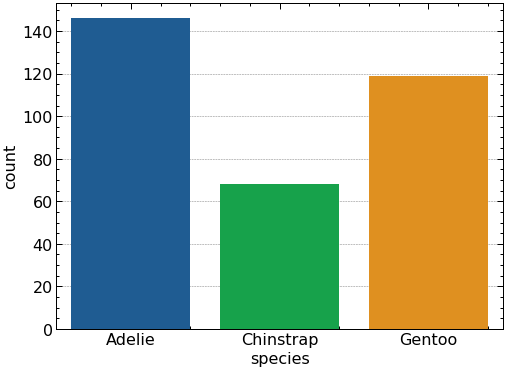

In [49]:
# menggambarkan species dalam bentuk countplot
sns.countplot(x='species', data=df);

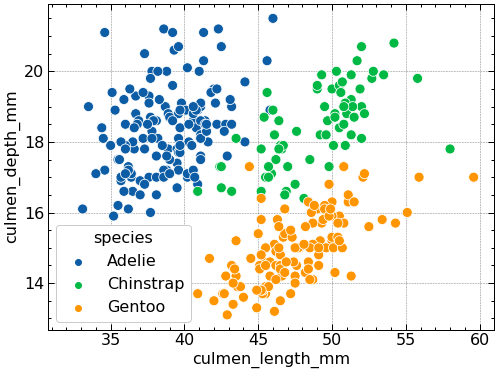

In [19]:
# sebaran data culmen berdasarkan species
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=df, s=100);

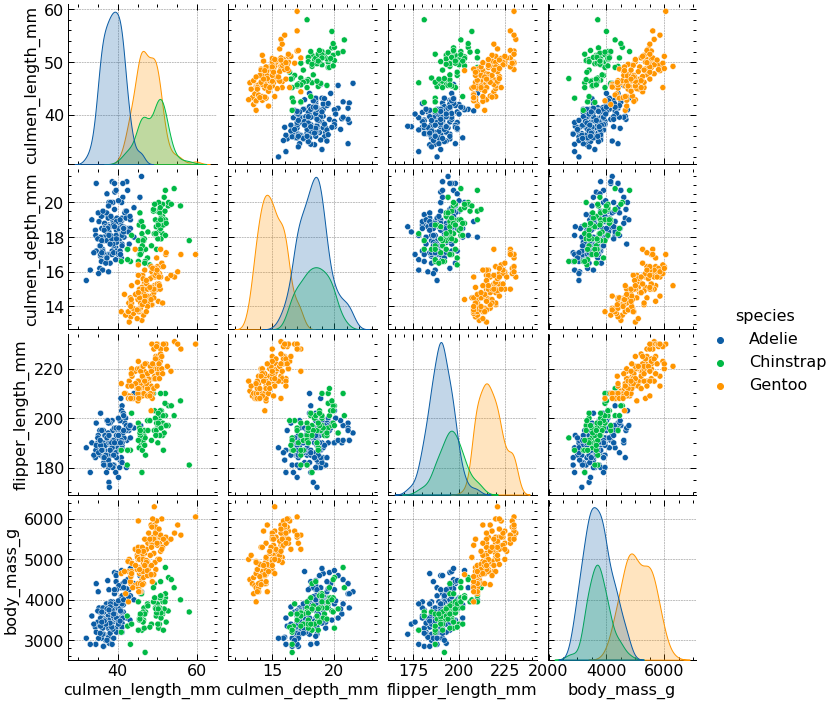

In [20]:
#ringkasan singkat pada semua kolom berdasarkan kolom species
sns.pairplot(df, hue='species');

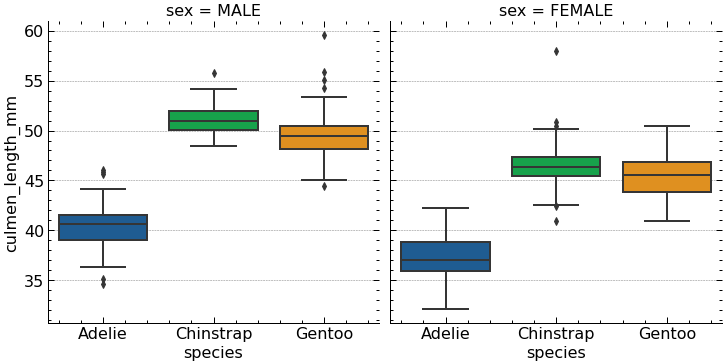

In [21]:
# menggambarkan species dan culmen berdasrkan kolom sex -jenis kelamin
sns.catplot(x='species', y='culmen_length_mm', col='sex', kind='box', data=df);

In [22]:
# merubah klom kategori menjadi indikator
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [23]:
# membagi data menjadi feature dan target
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

## Split data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# menetapkan data train 80% dan data tes 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)

## Preprocessing Scaling data

In [26]:
# proses prepocessing data sehingga nili ditribusi akan memiliki nilai 0 dan standard deviasi 1
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Model Random Forest Classifier dan Hyperparameter Tuning GridSearchCV

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
#help(RandomForestClassifier)

In [32]:
# menetapkan model RandomForestClassifier
model = RandomForestClassifier()

In [33]:
# menetapkan nilai untuk di jadikan parameter dala param grid
np.random.seed(0)
n_estimators = [int(x) for x in np.linspace(start=10, stop = 300, num=7)]
max_depth = [2,3,4]
bootstrap = [True, False]
oob_score = [True, False]

In [34]:
param_grid = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'bootstrap' : bootstrap,
             'oob_score' : oob_score}

In [35]:
# membuat model menggunkan gridsearchcv  untuk mendapatkan parameter terbaik
grid = GridSearchCV(model, param_grid)

In [36]:
# data training menggunakan gridsearchcv
grid.fit(X_train_scaler, y_train)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. T

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3, 4],
                         'n_estimators': [10, 58, 106, 155, 203, 251, 300],
                         'oob_score': [True, False]})

In [37]:
# hasil model terbaik setelah di training
grid.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=58)

In [38]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 58,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
# mencari nilai feature importances 
grid.best_estimator_.feature_importances_

array([0.33165146, 0.13147291, 0.2907713 , 0.08322716, 0.14204148,
       0.01386773, 0.00696796])

In [40]:
# membuat dataframe dari feature importances
features =pd.DataFrame(index = X.columns, data =grid.best_estimator_.feature_importances_, columns=['importances']).sort_values(ascending=False, by='importances')
features

,importances
culmen_length_mm,0.331651
flipper_length_mm,0.290771
island_Dream,0.142041
culmen_depth_mm,0.131473
body_mass_g,0.083227
island_Torgersen,0.013868
sex_MALE,0.006968


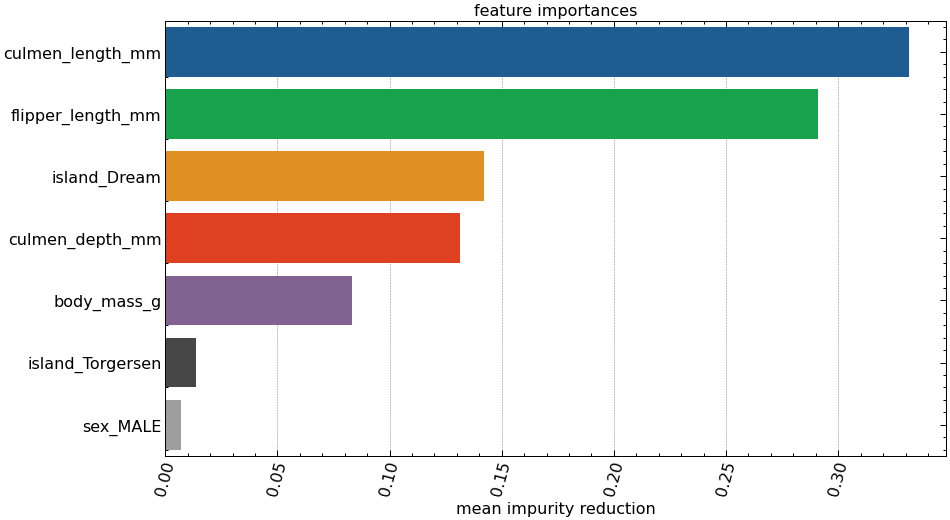

In [41]:
plt.figure(figsize=(14, 8))
sns.barplot( x=features.importances, y=features.index);
plt.title('feature importances')
plt.xlabel('mean impurity reduction')
plt.xticks(rotation=75)
plt.show()

dari plot diatas dapat di simpulkan bahwa fitur culmen_length_mm sangat membantu pada model kita untuk membedakan jenis species pada pinguin

In [42]:
# prediksi model
preds = grid.predict(X_test_scaler)

## Evaluasi model

In [43]:
# membuat metrik 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [44]:
confusion_matrix(y_test, preds)

array([[30,  1,  0],
       [ 0, 16,  0],
       [ 0,  0, 20]], dtype=int64)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


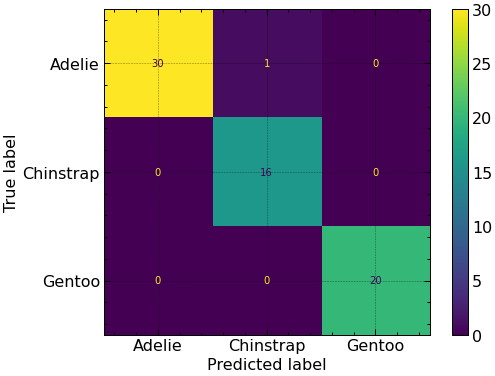

In [45]:
plot_confusion_matrix(grid, X_test_scaler, y_test)

In [46]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [47]:
accuracy_score(y_test, preds)

0.9850746268656716